In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.express as px


In [2]:
sns.set_theme(color_codes=True)
sns.set_style('white')
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv('mushrooms.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## The Data

<img src="mushroom.jpg" width="400" height="400">

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

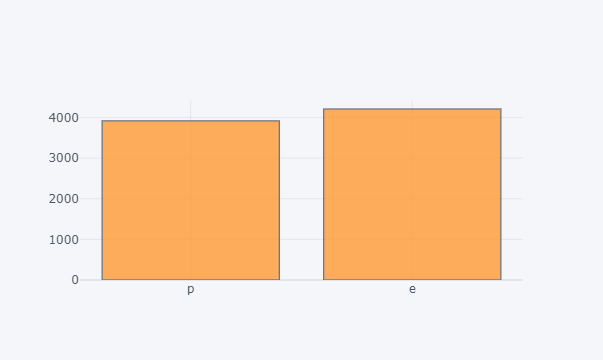

In [5]:
df['class'].iplot(kind='hist')

In [6]:
unique_feat = df.describe().transpose().reset_index().sort_values('unique')

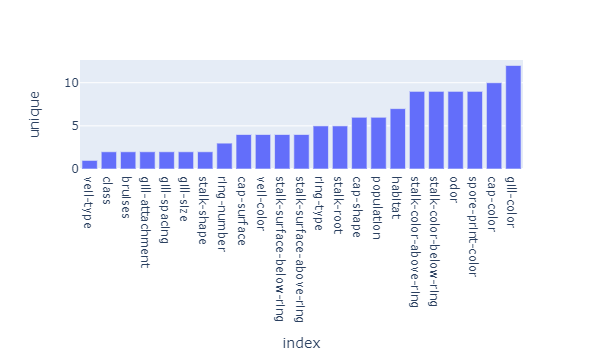

In [7]:
fig = px.bar(unique_feat,x='index',y='unique')
fig.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<AxesSubplot:>

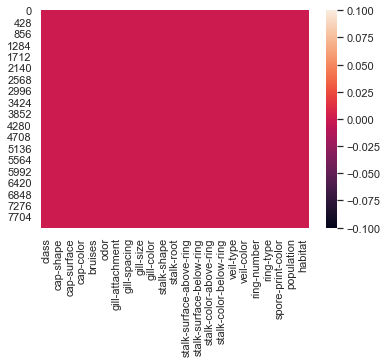

In [9]:
sns.heatmap(df.isnull())

In [10]:
X = df.drop('class',axis=1)

In [11]:
X = pd.get_dummies(X,drop_first=True)

In [12]:
y = df['class']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [15]:
from sklearn.ensemble import AdaBoostClassifier

In [16]:
adamodel = AdaBoostClassifier(n_estimators=1)

In [17]:
adamodel.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

In [18]:
adapred = adamodel.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [20]:
print(classification_report(y_test,adapred))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [21]:
adamodel.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
adamodel.feature_importances_.argmax()

22

In [23]:
X.columns[22]

'odor_n'

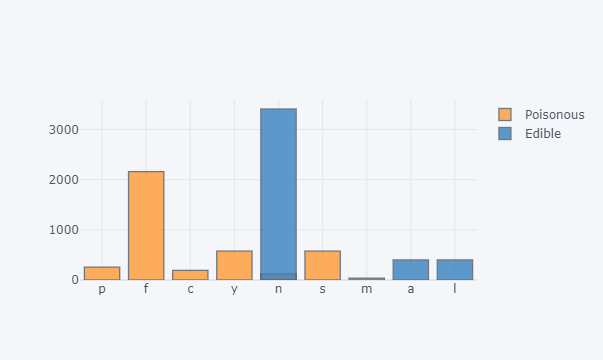

In [24]:
df['Poisonous']=df[df['class']=='p']['odor']
df['Edible']=df[df['class']=='e']['odor']

df[['Poisonous','Edible']].iplot(kind='hist')

In [25]:
len(X.columns)

95

In [26]:
error_rates = []

for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    err = 1 - accuracy_score(y_test,pred)
    error_rates.append(err)

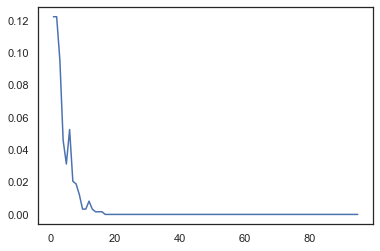

In [27]:
plt.plot(range(1,96),error_rates)

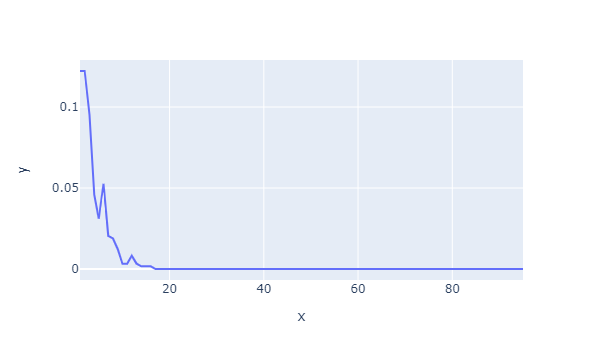

In [28]:
fig = px.line(x=range(1,96),y=error_rates)
fig.show()

In [29]:
model

AdaBoostClassifier(n_estimators=95)

In [30]:
featimp = pd.DataFrame(model.feature_importances_,X.columns,columns=['Importance'])

In [31]:
impfeat = featimp[featimp['Importance']>0]

In [32]:
impfeat.transpose()

,cap-color_c,cap-color_n,cap-color_w,bruises_t,odor_c,odor_f,odor_n,odor_p,gill-spacing_w,gill-size_n,...,stalk-surface-above-ring_k,stalk-surface-below-ring_y,stalk-color-below-ring_n,stalk-color-below-ring_w,ring-number_t,spore-print-color_r,spore-print-color_w,population_c,population_v,habitat_w
Importance,0.010526,0.010526,0.010526,0.052632,0.031579,0.031579,0.063158,0.021053,0.094737,0.094737,...,0.063158,0.031579,0.063158,0.010526,0.010526,0.052632,0.168421,0.105263,0.042105,0.010526


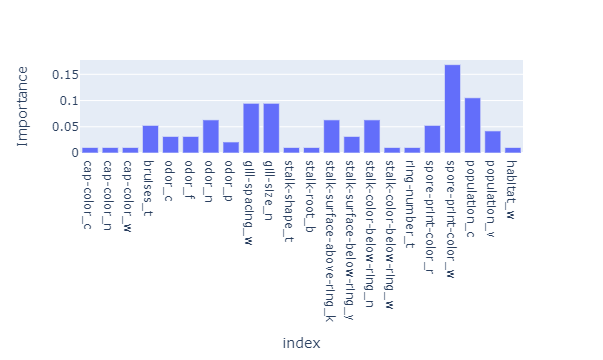

In [33]:
fig = px.bar(impfeat,x=impfeat.index,y='Importance')
fig.show()

In [34]:
ABmodel = AdaBoostClassifier(n_estimators=16)

In [35]:
ABmodel.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=16)

In [36]:
ABpred = ABmodel.predict(X_test)

In [37]:
print(classification_report(y_test,ABpred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [38]:
ABmodel.feature_importances_

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.0625, 0.0625, 0.0625, 0.    , 0.    , 0.125 , 0.0625,
       0.    , 0.    , 0.    , 0.    , 0.125 , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.0625, 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.0625, 0.    , 0.125 , 0.    , 0.0625, 0.    , 0.    , 0.125 ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ])

In [39]:
featimp1 = pd.DataFrame(ABmodel.feature_importances_,X.columns,columns=['importance'])

In [40]:
impfeat1 = featimp1[featimp1['importance']>0]

In [41]:
impfeat1.transpose()

,bruises_t,odor_c,odor_f,odor_n,odor_p,gill-size_n,stalk-surface-above-ring_k,stalk-surface-below-ring_y,spore-print-color_r,spore-print-color_w,population_c,population_v
importance,0.0625,0.0625,0.0625,0.125,0.0625,0.125,0.0625,0.0625,0.0625,0.125,0.0625,0.125


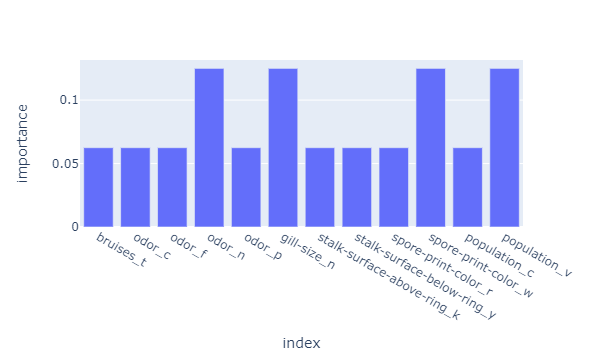

In [42]:
fig = px.bar(impfeat1,x=impfeat1.index,y='importance')
fig.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc = RandomForestClassifier(n_estimators=1,max_depth=1)

In [45]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=1, n_estimators=1)

In [46]:
rfcpred = rfc.predict(X_test)

In [47]:
rfc.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
rfc.feature_importances_.argmax()

78

In [49]:
X.columns[19]

'odor_f'

In [50]:
rfc

RandomForestClassifier(max_depth=1, n_estimators=1)

In [51]:
rfcmodel = RandomForestClassifier()

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
n_estimators = [32,64,100,150,200]
criterion  = ['gini','entropy']
max_features = ["sqrt", "log2"]

param_grid = {'n_estimators':n_estimators, 'criterion':criterion, 'max_features':max_features}
                

In [54]:
grid_model = GridSearchCV(rfcmodel,param_grid,cv=5,verbose=1)

In [55]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [32, 64, 100, 150, 200]},
             verbose=1)

In [56]:
grid_model.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 32}

In [57]:
grid_model.best_score_

1.0

In [58]:
gridpred = grid_model.predict(X_test)

In [59]:
print(classification_report(y_test,gridpred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [60]:
newrfc = RandomForestClassifier(n_estimators=32)

In [61]:
newrfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=32)

In [62]:
featimp2  = pd.DataFrame(newrfc.feature_importances_,X.columns,columns=['importancerfc'])

In [63]:
impfeat12 = featimp2[featimp2['importancerfc']>0]

In [64]:
impfeat12.transpose()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
importancerfc,0.000216,0.000937,0.000218,0.000148,0.000872,0.000164,0.006776,0.002768,0.00032,0.000474,...,0.003649,0.005504,0.041557,0.004104,0.012724,0.003172,0.007225,0.00209,0.008156,0.003082


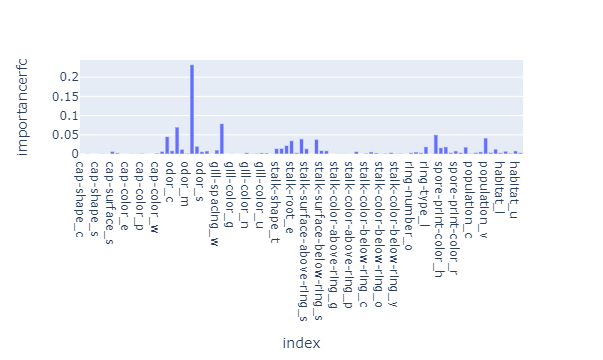

In [65]:
fig = px.bar(impfeat12,x=impfeat12.index,y='importancerfc')
fig.show()

## Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
GBmodel = GradientBoostingClassifier()

In [68]:
from sklearn.model_selection import GridSearchCV

In [70]:
n_estimators = [50,100]
learning_rate = [0.1,0.05,0.2]
max_depth = [3,4,5]

param_grid = {'n_estimators':n_estimators, 'learning_rate':learning_rate, 'max_depth':max_depth}

In [71]:
grid_model = GridSearchCV(GBmodel,param_grid,cv=5,verbose=1)

In [72]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]},
             verbose=1)

In [73]:
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [74]:
grid_model.best_score_

0.9997103548153511

In [75]:
grid_pred = grid_model.predict(X_test)

In [76]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [79]:
featimp = pd.DataFrame(grid_model.best_estimator_.feature_importances_,X.columns,columns=['Imp'])

In [84]:
featimp = featimp[featimp['Imp']>0.0005]

In [85]:
featimp.transpose()

,cap-surface_g,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_n,odor_p,gill-spacing_w,gill-size_n,...,stalk-color-above-ring_w,stalk-color-below-ring_y,ring-number_o,ring-type_n,spore-print-color_h,spore-print-color_r,spore-print-color_u,spore-print-color_w,population_c,population_y
Imp,0.00105,0.002311,0.051582,0.000624,0.014146,0.01825,0.614744,0.003949,0.012509,0.010598,...,0.00397,0.003023,0.001807,0.003188,0.007256,0.030495,0.0041,0.000661,0.001175,0.000677


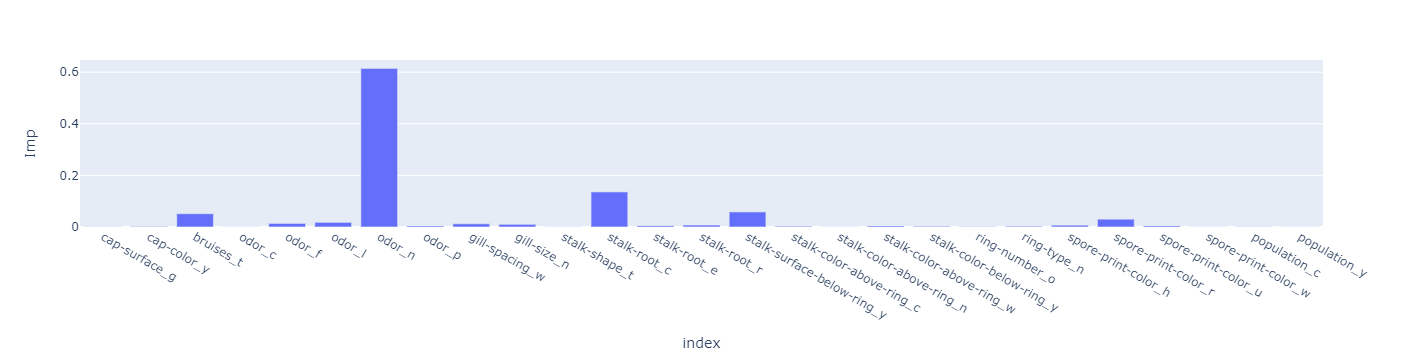

In [86]:
fig = px.bar(featimp,x=featimp.index,y='Imp')
fig.show()